In [2]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:
df = pd.read_csv('vaccination_all_tweets.csv')

In [6]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [8]:
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [9]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [10]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date','hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis = 1)

text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [11]:
print(text_df['text'].iloc[0], "\n")
print(text_df['text'].iloc[1], "\n")
print(text_df['text'].iloc[2], "\n")
print(text_df['text'].iloc[3], "\n")
print(text_df['text'].iloc[4], "\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [12]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    228207 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [13]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r'https\S+|www\S+https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return ' '.join(filtered_text)

In [14]:
text_df.text = text_df['text'].apply(data_processing)

In [15]:
text_df = text_df.drop_duplicates('text')

In [16]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [17]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [18]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [19]:
print(text_df['text'].iloc[0], "\n")
print(text_df['text'].iloc[1], "\n")
print(text_df['text'].iloc[2], "\n")
print(text_df['text'].iloc[3], "\n")
print(text_df['text'].iloc[4], "\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [20]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211771 entries, 0 to 228206
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    211771 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB


In [21]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [22]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [23]:
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [24]:
def sentiment(label):
    if label < 0:
        return 'Negative'
    elif label == 0:
        return 'Neutral'
    elif label > 0:
        return 'Positive'

In [25]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [26]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

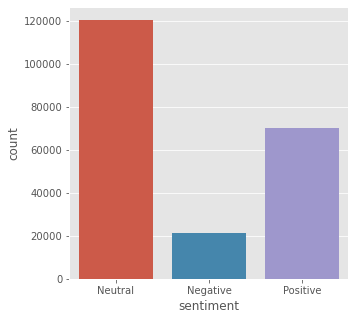

In [27]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

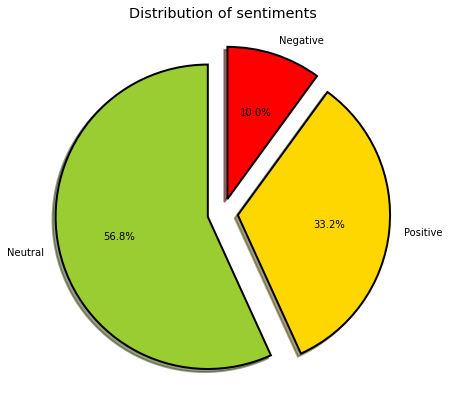

In [28]:
fig = plt.figure(figsize=(7,7))
colors = ('yellowgreen', 'gold', 'red')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, wedgeprops = wp, explode = explode,
         label='')
plt.title('Distribution of sentiments')

In [29]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending = False)
pos_tweets.head()

,text,polarity,sentiment
186294,jimcramer ocgn squeeze soon ho approval covaxi...,1.0,Positive
171520,amelscript ho govcanhealth us_fda cdcgov needs...,1.0,Positive
171516,cdcgov cdcmmwr ho govcanhealth us_fda cdcgov n...,1.0,Positive
171517,nytimes ho govcanhealth us_fda cdcgov needs ap...,1.0,Positive
222829,rhesus macaque monkeys believed best nonhuman ...,1.0,Positive


<function matplotlib.pyplot.show(close=None, block=None)>

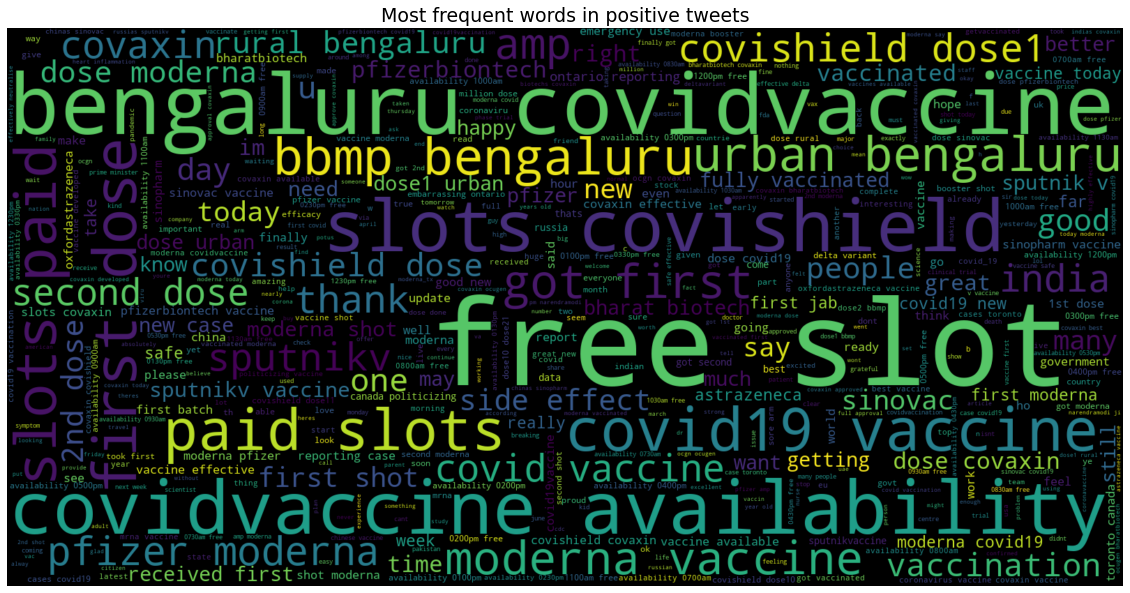

In [30]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show

In [31]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending = False)
neg_tweets.head()

,text,polarity,sentiment
61880,woke around 1 sweaty fever broken pretty much ...,-6.938894e-18,Negative
53579,grannygail31 congrats gg first dose moderna tu...,-9.251859e-18,Negative
128724,double dosed ass currently kicked tired bit wo...,-1.110223e-17,Negative
83234,zombie translating pziser blue zombie basic sl...,-1.110223e-17,Negative
220222,oh man moderna youre looking good article im s...,-1.850372e-17,Negative


<function matplotlib.pyplot.show(close=None, block=None)>

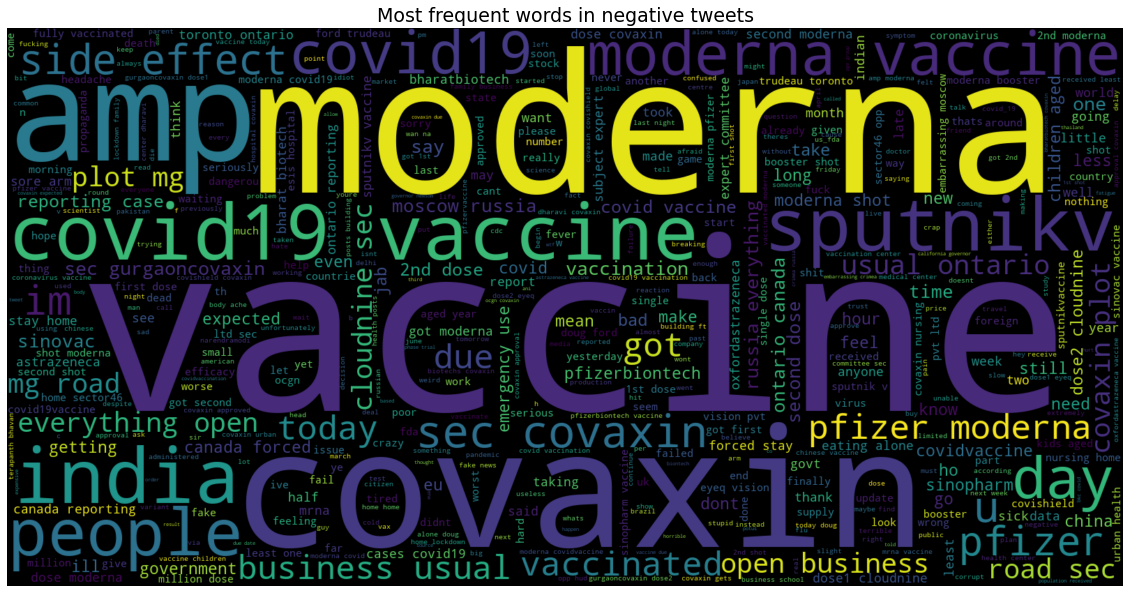

In [32]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show

In [33]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending = False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
151502,000059 411007 06082021 187 dose2 pmc p apollo ...,0.0,Neutral
151516,000005 411014 07082021 118 dose2 pmc p apollo ...,0.0,Neutral
151515,000006 400602 07082021 292 dose1 tmc p highway...,0.0,Neutral
151514,000007 400602 07082021 172 dose2 tmc p highway...,0.0,Neutral


<function matplotlib.pyplot.show(close=None, block=None)>

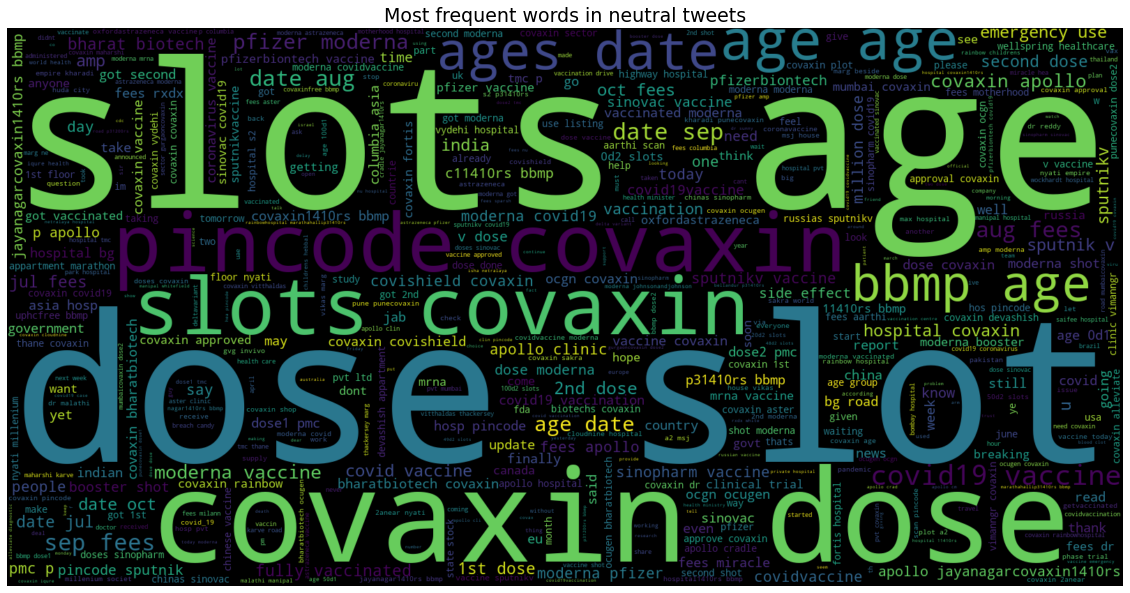

In [34]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show

In [35]:
vect = CountVectorizer(ngram_range =(1,2)).fit(text_df['text'])

In [36]:
feature_names = vect.get_feature_names()
print('Number of features: {}\n'.format(len(feature_names)))
print('First 20 features:\n {}'.format(feature_names[:20]))

Number of features: 897583

First 20 features:
 ['00', '00 doses', '000', '000 00', '000 000the', '000 717', '000 belgium', '000 covid19', '000 deaths', '000 donated', '000 dose', '000 doses', '000 first', '000 half', '000 health', '000 initial', '000 people', '000 purchased', '000 sha', '000 share']


In [37]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
print('Size of x_train:', (x_train.shape))
print('Size of y_train:', (y_train.shape))
print('Size of x_test:', (x_test.shape))
print('Size of y_test:', (y_test.shape))

Size of x_train: (169416, 897583)
Size of y_train: (169416,)
Size of x_test: (42355, 897583)
Size of y_test: (42355,)


In [40]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print('Test accuracy: {:.2f}%'.format(logreg_acc*100))

Test accuracy: 96.66%


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[ 3589   449   265]
 [   28 23975    78]
 [  148   446 13377]]


              precision    recall  f1-score   support

    Negative       0.95      0.83      0.89      4303
     Neutral       0.96      1.00      0.98     24081
    Positive       0.97      0.96      0.97     13971

    accuracy                           0.97     42355
   macro avg       0.96      0.93      0.95     42355
weighted avg       0.97      0.97      0.97     42355



In [42]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot

<bound method ConfusionMatrixDisplay.plot of <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001DD01DFE7F0>>

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [45]:
print('Best parameters:', grid.best_params_)

Best parameters: {'C': 10}


In [46]:
y_pred = grid.predict(x_test)

In [47]:
logreg_acc = accuracy_score(y_pred, y_test)
print('Test accuracy: {:.2f}%'.format(logreg_acc*100))

Test accuracy: 97.18%


In [48]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[ 3589   449   265]
 [   28 23975    78]
 [  148   446 13377]]


              precision    recall  f1-score   support

    Negative       0.95      0.83      0.89      4303
     Neutral       0.96      1.00      0.98     24081
    Positive       0.97      0.96      0.97     13971

    accuracy                           0.97     42355
   macro avg       0.96      0.93      0.95     42355
weighted avg       0.97      0.97      0.97     42355



In [49]:
from sklearn.svm import LinearSVC

In [50]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [51]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print('test accuracy: {:.2f}%'.format(svc_acc*100))

test accuracy: 97.85%


In [52]:
print(confusion_matrix(y_test, svc_pred))
print('\n')
print(classification_report(y_test, svc_pred))

[[ 3855   224   224]
 [   30 23978    73]
 [  136   222 13613]]


              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      4303
     Neutral       0.98      1.00      0.99     24081
    Positive       0.98      0.97      0.98     13971

    accuracy                           0.98     42355
   macro avg       0.97      0.96      0.96     42355
weighted avg       0.98      0.98      0.98     42355



In [53]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[1,3,5,7],
    'gamma':[0.01, 1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [54]:
print('Best parameter:', grid.best_params_)

Best parameter: {'C': 10}


In [55]:
y_pred = grid.predict(x_test)

In [56]:
logreg_acc = accuracy_score(y_pred, y_test)
print('Test accuracy: {:.2f}%'.format(logreg_acc*100))

Test accuracy: 97.90%


In [57]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[ 3866   216   221]
 [   28 23978    75]
 [  136   212 13623]]


              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      4303
     Neutral       0.98      1.00      0.99     24081
    Positive       0.98      0.98      0.98     13971

    accuracy                           0.98     42355
   macro avg       0.97      0.96      0.96     42355
weighted avg       0.98      0.98      0.98     42355



In [60]:
import json

In [75]:
class MyLogReg(LogisticRegression):
    
    # Override the class constructor
    def _init_(self, C=1.0, solver='liblinear', max_iter=100,X_train=None, Y_train=None):
        LogisticRegression._init_(self,C=C,solver=solver,max_iter=max_iter)
        self.X_train = X_train
        self.Y_train = Y_train
        
    # a method for saving object data to JSON file
    def save_json(self, filepath):
        dict_= {}
        dict_['C'] = self.C
        dict_['max_iter'] = self.max_iter
        dict_['solver'] = self.solver
        dict_['X_train'] = self.X_train.tolist() if self.X_train is not None else 'None'
        dict_['Y_train'] = self.Y_train.tolist() if self.Y_train is not None else 'None'
        
        # Create json and save to file
        json_txt = json.dumps(dict_, indent=4)
        with open(filepath, 'w') as file:
            file.write(json_txt)
            
    # A method for loading data from JSON file
    def load_json(self, filepath):
        with open(filepath, 'r') as file:
            dict_= json.load(file)
            
        self.C = dict_['C']
        self.max_iter = dict_['max_iter']
        self.solver = dict_['solver']
        self.X_train = np.asarray(dict_['X_train']) if dict_['X_train'] != 'None' else None
        self.Y_train = np.asarray(dict_['Y_train']) if dict_['Y_train'] != 'None' else None

In [87]:
filepath = 'mylogreg.json'

# Create a model and train it
mylogreg = MyLogReg(X_train=Xtrain, Y_train=Ytrain)
mylogreg.save_json(filepath)

# Create a new object and load its data from JSON file
json_mylogreg = MyLogReg()
json_mylogreg.load_json(filepath)
json_mylogreg

AttributeError: 'MyLogReg' object has no attribute 'X_train'